In [39]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [40]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [41]:
df = pd.read_csv("/content/gdrive/MyDrive/college_project/reviews.csv")

In [42]:
df.head()

,comments,reviews
0,The Da Vinci Code book is just awesome.,1
1,this was the first clive cussler i've ever rea...,1
2,i liked the Da Vinci Code a lot.,1
3,i liked the Da Vinci Code a lot.,1
4,I liked the Da Vinci Code but it ultimatly did...,1


In [43]:
df.shape

(6918, 2)

In [44]:
df.isna().any()

comments    False
reviews     False
dtype: bool

In [45]:
df['comments_1'] = df['comments'].str.lower()

In [46]:
df.head()

,comments,reviews,comments_1
0,The Da Vinci Code book is just awesome.,1,the da vinci code book is just awesome.
1,this was the first clive cussler i've ever rea...,1,this was the first clive cussler i've ever rea...
2,i liked the Da Vinci Code a lot.,1,i liked the da vinci code a lot.
3,i liked the Da Vinci Code a lot.,1,i liked the da vinci code a lot.
4,I liked the Da Vinci Code but it ultimatly did...,1,i liked the da vinci code but it ultimatly did...


In [47]:
df['comments_1'] = df['comments_1'].str.replace('\d+', '')

In [48]:
df.head()

,comments,reviews,comments_1
0,The Da Vinci Code book is just awesome.,1,the da vinci code book is just awesome.
1,this was the first clive cussler i've ever rea...,1,this was the first clive cussler i've ever rea...
2,i liked the Da Vinci Code a lot.,1,i liked the da vinci code a lot.
3,i liked the Da Vinci Code a lot.,1,i liked the da vinci code a lot.
4,I liked the Da Vinci Code but it ultimatly did...,1,i liked the da vinci code but it ultimatly did...


In [49]:
df['comments_1'] = df['comments_1'].str.strip()
df.head()

,comments,reviews,comments_1
0,The Da Vinci Code book is just awesome.,1,the da vinci code book is just awesome.
1,this was the first clive cussler i've ever rea...,1,this was the first clive cussler i've ever rea...
2,i liked the Da Vinci Code a lot.,1,i liked the da vinci code a lot.
3,i liked the Da Vinci Code a lot.,1,i liked the da vinci code a lot.
4,I liked the Da Vinci Code but it ultimatly did...,1,i liked the da vinci code but it ultimatly did...


In [50]:
df.head()

,comments,reviews,comments_1
0,The Da Vinci Code book is just awesome.,1,the da vinci code book is just awesome.
1,this was the first clive cussler i've ever rea...,1,this was the first clive cussler i've ever rea...
2,i liked the Da Vinci Code a lot.,1,i liked the da vinci code a lot.
3,i liked the Da Vinci Code a lot.,1,i liked the da vinci code a lot.
4,I liked the Da Vinci Code but it ultimatly did...,1,i liked the da vinci code but it ultimatly did...


In [51]:
X = df['comments_1']
y = df['reviews']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [52]:
print("Shape of X-train : ",X_train.shape[0])
print("Shape of X-test : ",X_test.shape[0])

Shape of X-train :  4635
Shape of X-test :  2283


In [53]:
count_vect = CountVectorizer() #in scikit-learn
count_vect.fit(X_train)
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)

final_counts = count_vect.transform(X_train)
test_data = count_vect.transform(X_test)

print("the type of count vectorizer ",type(final_counts))
print("the shape of out text BOW vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])

some feature names  ['able', 'abortion', 'about', 'absolute', 'absolutely', 'absurd', 'academy', 'acceptable', 'accompaniment', 'according']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (4635, 1685)
the number of unique words  1685


In [54]:
clf = LogisticRegression(random_state=0)
clf.fit(final_counts, y_train)
predict = clf.predict(test_data)
accuracy_score(y_test, predict)

0.9894875164257556

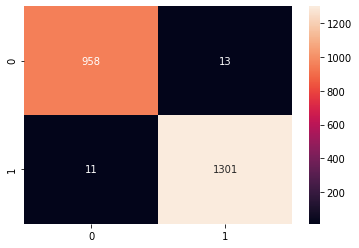

In [55]:
result = confusion_matrix(y_test, predict)
sns.heatmap(result, annot=True, fmt="d")
